# Crypto Website Pull

## Introduction

Crypto currency has been gaining more traction as of late, to learn more about crypto currencies and their trends we need to start recording the values over time. When we do this we can use this data to find patterns and keep an eye on each currency's worth. This method of collection can be used for numerous other websites or purposes but crypto currency is the example we'll use as it's a very dynamic object that will give us varied readings in a short amount of time. 

From the data we collect we can find patterns to give us more insight on each currency. 

### The Data

Because there is so much information on this website, I'm going to cover only the information we use to keep things simple.

id: Unique identifier of each currency (Integer)
name: Name of Each Currency (String)
max_supply: The maximum amount of this currency that can be bought (Float)
circulating_supply: Current amount of currency in circulation (Float)
total_supply: Amount of coins that are in circulation and newly mined coins not yet in circulation (Float)
infinite_supply: Whether or not a currency has a maximum supply (Boolean)
last_updated: The last time the price was updated (Float)
quote.USD.price: Price of currency in USD (Float)
quote.USD.percent_change_1h: Percent change in value over 1 hour (FLoat)
quote.USD.percent_change_24h: Percent change in value over 24 hours (Float)
quote.USD.percent_change_7d: Percent change in value over 7 days (Float)
quote.USD.percent_change_30d: Percent change in value over 30 days (Float)
quote.USD.percent_change_60d: Percent change in value over 60 days (Float)
quote.USD.percent_change_90d: Percent change in value over 90 days (Float)
quote.USD.last_updated: The last time the USD price was updated (Float)
timestamp: The time when this data was collected (Date)

### Questions
1. Has crypto currency been going up or down lately?
2. What crytpo currency is the most stable?
3. What crypto currency would be best to invest in right now?

### Aquiring Data
For the data collection I'll be using this website: 'https://coinmarketcap.com/'

I'll be importing Request, Session, ConnectionError, Timeout, and TooManyRedirects for reading the data from the website. I also used json to turn that info into a DataFrame tha I can use to gain insights into the data.

The code here will read the data from the website to a dictionary value.

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
}
headers = {
    'Accepts':'application/json',
    'x-CMC_PRO_API_Key':'69d79cc9-c2fa-4434-a927-df0e653ea2e0'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except(ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2025-04-26T23:18:46.948Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9810}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12051, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [88]:
type(data)

dict

### Turning Data Usable
To be able to use the data we need to turn it inot a DataFrame so that we can wrangle it. Using json we can easily normalize the data we collect from teh website into a DataFrame and we'll add a timestamp as well so we know when each row was aquired. We can see the results from one pull here.

In [90]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [92]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19853462.00000,19853462.00000,False,NaN,1,NaN,NaN,None,2025-04-19T15:39:00.000Z,85307.29866,13405816912.09033,-24.69550,-0.11875,1.09120,0.18129,0.47356,-10.78318,-18.78584,1693645212211.33569,62.84320,1791453271799.05005,None,2025-04-19T15:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
1,1027,Ethereum,ETH,ethereum,10138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120703159.49030,120703159.49030,True,NaN,2,NaN,NaN,None,2025-04-19T15:38:00.000Z,1605.65069,6168280451.40280,-37.62650,0.03640,1.49181,-3.46903,-18.42745,-40.15950,-52.51296,193807111802.18942,7.19130,193807111802.19000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
2,825,Tether USDt,USDT,tether,124735,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144640112847.93365,148032435823.63278,True,NaN,3,NaN,NaN,None,2025-04-19T15:38:00.000Z,0.99982,32857007001.94557,-19.64580,-0.00677,-0.00038,0.01309,0.01332,-0.01297,0.11426,144614543542.32260,5.36600,148006266827.23999,None,2025-04-19T15:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-19 10:39:19.415041
3,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58394167593.00000,99986232255.00000,False,NaN,4,NaN,NaN,None,2025-04-19T15:38:00.000Z,2.08308,1547964786.17858,-28.53430,-0.06975,1.11729,-3.64033,-14.99560,-18.65210,-33.73880,121639569181.90765,4.51350,208307737220.81000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
4,1839,BNB,BNB,bnb,2473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140890885.86000,140890885.86000,False,NaN,5,NaN,NaN,None,2025-04-19T15:38:00.000Z,589.78913,1271617593.49233,-12.05670,0.13590,-0.66341,-1.61071,-5.24788,-9.24639,-15.34278,83095912471.81335,3.08330,83095912471.81000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
5,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516600345.12966,598877005.57354,True,NaN,6,NaN,NaN,None,2025-04-19T15:38:00.000Z,139.39262,2318878202.33108,-19.24910,-0.06953,4.86757,6.24546,8.20648,-15.83444,-48.38568,72010274610.94655,2.67050,83479033717.46001,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
6,3408,USDC,USDC,usd-coin,27215,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60905869233.36766,60905869233.36766,False,NaN,7,NaN,NaN,None,2025-04-19T15:38:00.000Z,0.99988,4188776611.29054,-35.59200,-0.00601,0.00084,-0.01537,-0.01044,-0.02791,-0.04570,60898782481.98161,2.25970,60898782481.98000,None,2025-04-19T15:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-19 10:39:19.415041
7,74,Dogecoin,DOGE,dogecoin,1207,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148918606383.70523,148918606383.70523,True,NaN,8,NaN,NaN,None,2025-04-19T15:39:00.000Z,0.15821,501559352.32383,-5.19920,0.02443,1.63279,-5.95087,-6.99780,-36.44277,-59.27317,23559691154.73902,0.87420,23559691154.74000,None,2025-04-19T15

### Automating
Now that we can collect data and turn it into a DataFrame our next step is to automate the process so we can collect multiple instances of each currency's value over whatever amount of time we desire. I'll read this information into a csv file to easily combine the data.

In [94]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'20',
        'convert':'USD'
    }
    headers = {
        'Accepts':'application/json',
        'x-CMC_PRO_API_Key':'69d79cc9-c2fa-4434-a927-df0e653ea2e0'
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except(ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\ciret\OneDrive\Desktop\Data Analyst\Data\API.csv'):
        df.to_csv(r'C:\Users\ciret\OneDrive\Desktop\Data Analyst\Data\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\ciret\OneDrive\Desktop\Data Analyst\Data\API.csv',mode='a')

In [44]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API_Runner Instances: ' + str(i+1))
    sleep(60)
exit()

API_Runner Instances: 1
API_Runner Instances: 2
API_Runner Instances: 3
API_Runner Instances: 4
API_Runner Instances: 5


KeyboardInterrupt: 

### CSV to DataFrame
Now that I have a csv file the information that we collected can be read into a DataFrame for use. 

In [96]:
df3 = pd.read_csv(r'C:\Users\ciret\OneDrive\Desktop\Data Analyst\Data\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19853462.0,19853462.0,False,NaN,1,NaN,NaN,NaN,2025-04-19T15:14:00.000Z,85432.0440000701,12802300046.932028,-29.1411,-0.02961974,1.12093724,0.92115424,-0.61316819,-10.61896394,-18.33598445,1696121839137.7197,62.9917,1794072924001.47,NaN,2025-04-19T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:13:46.495556
1,1.00000,1027,Ethereum,ETH,ethereum,10138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120703159.49029723,120703159.49029723,True,NaN,2,NaN,NaN,NaN,2025-04-19T15:14:00.000Z,1607.8939654069336,6077750225.825173,-39.085,0.08045444,1.54898961,-2.52800868,-19.21694695,-40.18607976,-52.70943045,194077881749.99957,7.2078,194077881750.0,NaN,2025-04-19T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:13:46.495556
2,2.00000,825,Tether USDt,USDT,tether,124735,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144640112847.93365,148032435823.63278,True,NaN,3,NaN,NaN,NaN,2025-04-19T15:13:00.000Z,0.999903608973707,31953287015.29787,-22.6968,-0.00524255,-0.01131129,0.02201349,0.03184782,0.02314269,0.1275058,144626170839.01312,5.3712,148018166825.22,NaN,2025-04-19T15:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-19 10:13:46.495556
3,3.00000,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,58394167593.0,99986232255.0,False,NaN,4,NaN,NaN,NaN,2025-04-19T15:14:00.000Z,2.083966256058157,1561076063.7739186,-29.2281,-0.2665132,1.09898776,-3.00751956,-16.27681459,-18.96954078,-33.79241428,121691474814.41678,4.5195,208396625605.82,NaN,2025-04-19T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:13:46.495556
4,4.00000,1839,BNB,BNB,bnb,2473,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,140890885.86,140890885.86,False,NaN,5,NaN,NaN,NaN,2025-04-19T15:13:00.000Z,589.6312938310274,1270371018.8725133,-12.3453,0.07866027,-0.65993835,-1.44447545,-5.89396587,-9.68894742,-15.32809999,83073675318.63141,3.0852,83073675318.63,NaN,2025-04-19T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:13:46.495556
5,5.00000,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,516600345.1296557,598877005.5735406,True,NaN,6,NaN,NaN,NaN,2025-04-19T15:14:00.000Z,139.70366566555774,2274897038.3729506,-21.3509,0.08006665,5.23362782,7.47654429,6.96238003,-16.09391409,-47.87254944,72170961898.70515,2.6805,83665312961.44,NaN,2025-04-19T15:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:13:46.495556
6,6.00000,3408,USDC,USDC,usd-coin,27215,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,60905869233.36766,60905869233.36766,False,NaN,7,NaN,NaN,NaN,2025-04-19T15:14:00.000Z,0.9999878958229218,4133276251.2613373,-37.1474,0.00889814,-0.00060975,0.0170742,0.00165156,-0.02760177,0.0007124,60905132017.94136,2.2619,60905132017.94,NaN,2025-04-19T15:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-19 10:13:46.495556
7,7.00000,74,Dogecoin,DOGE,dogecoin,1207,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148918606383.70523,148918606383.70523,True,NaN,8,NaN

### Standardization
Now that we have the information we can begin to standardize it, here I make sure that floats have the same length.

In [98]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [100]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19853462.00000,19853462.00000,False,NaN,1,NaN,NaN,None,2025-04-19T15:39:00.000Z,85307.29866,13405816912.09033,-24.69550,-0.11875,1.09120,0.18129,0.47356,-10.78318,-18.78584,1693645212211.33569,62.84320,1791453271799.05005,None,2025-04-19T15:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
1,1027,Ethereum,ETH,ethereum,10138,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120703159.49030,120703159.49030,True,NaN,2,NaN,NaN,None,2025-04-19T15:38:00.000Z,1605.65069,6168280451.40280,-37.62650,0.03640,1.49181,-3.46903,-18.42745,-40.15950,-52.51296,193807111802.18942,7.19130,193807111802.19000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
2,825,Tether USDt,USDT,tether,124735,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,144640112847.93365,148032435823.63278,True,NaN,3,NaN,NaN,None,2025-04-19T15:38:00.000Z,0.99982,32857007001.94557,-19.64580,-0.00677,-0.00038,0.01309,0.01332,-0.01297,0.11426,144614543542.32260,5.36600,148006266827.23999,None,2025-04-19T15:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-19 10:39:19.415041
3,52,XRP,XRP,xrp,1591,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58394167593.00000,99986232255.00000,False,NaN,4,NaN,NaN,None,2025-04-19T15:38:00.000Z,2.08308,1547964786.17858,-28.53430,-0.06975,1.11729,-3.64033,-14.99560,-18.65210,-33.73880,121639569181.90765,4.51350,208307737220.81000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
4,1839,BNB,BNB,bnb,2473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140890885.86000,140890885.86000,False,NaN,5,NaN,NaN,None,2025-04-19T15:38:00.000Z,589.78913,1271617593.49233,-12.05670,0.13590,-0.66341,-1.61071,-5.24788,-9.24639,-15.34278,83095912471.81335,3.08330,83095912471.81000,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
5,5426,Solana,SOL,solana,899,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,516600345.12966,598877005.57354,True,NaN,6,NaN,NaN,None,2025-04-19T15:38:00.000Z,139.39262,2318878202.33108,-19.24910,-0.06953,4.86757,6.24546,8.20648,-15.83444,-48.38568,72010274610.94655,2.67050,83479033717.46001,None,2025-04-19T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-19 10:39:19.415041
6,3408,USDC,USDC,usd-coin,27215,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,60905869233.36766,60905869233.36766,False,NaN,7,NaN,NaN,None,2025-04-19T15:38:00.000Z,0.99988,4188776611.29054,-35.59200,-0.00601,0.00084,-0.01537,-0.01044,-0.02791,-0.04570,60898782481.98161,2.25970,60898782481.98000,None,2025-04-19T15:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-19 10:39:19.415041
7,74,Dogecoin,DOGE,dogecoin,1207,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148918606383.70523,148918606383.70523,True,NaN,8,NaN,NaN,None,2025-04-19T15:39:00.000Z,0.15821,501559352.32383,-5.19920,0.02443,1.63279,-5.95087,-6.99780,-36.44277,-59.27317,23559691154.73902,0.87420,23559691154.74000,None,2025-04-19T15

Here I'm looking at the data to see if there is any more cleaning I need to use before I use it.

In [102]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d']].mean()
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.11875
              quote.USD.percent_change_24h     1.09120
              quote.USD.percent_change_7d      0.18129
              quote.USD.percent_change_30d     0.47356
              quote.USD.percent_change_60d   -10.78318
Ethereum      quote.USD.percent_change_1h      0.03640
              quote.USD.percent_change_24h     1.49181
              quote.USD.percent_change_7d     -3.46903
              quote.USD.percent_change_30d   -18.42745
              quote.USD.percent_change_60d   -40.15950
Tether USDt   quote.USD.percent_change_1h     -0.00677
              quote.USD.percent_change_24h    -0.00038
              quote.USD.percent_change_7d      0.01309
              quote.USD.percent_change_30d     0.01332
              quote.USD.percent_change_60d    -0.01297
XRP           quote.USD.percent_change_1h     -0.06975
              quote.USD.percent_change_24h     1.11729
              quote.US

Now that the format is acceptable I'm going to group all the same currency together and average them.

In [104]:
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.11875
             quote.USD.percent_change_24h   1.09120
             quote.USD.percent_change_7d    0.18129
             quote.USD.percent_change_30d   0.47356
             quote.USD.percent_change_60d -10.78318
Ethereum     quote.USD.percent_change_1h    0.03640
             quote.USD.percent_change_24h   1.49181
             quote.USD.percent_change_7d   -3.46903
             quote.USD.percent_change_30d -18.42745
             quote.USD.percent_change_60d -40.15950
Tether USDt  quote.USD.percent_change_1h   -0.00677
             quote.USD.percent_change_24h  -0.00038
             quote.USD.percent_change_7d    0.01309
             quote.USD.percent_change_30d   0.01332
             quote.USD.percent_change_60d  -0.01297
XRP          quote.USD.percent_change_1h   -0.06975
             quote.USD.percent_change_24h   1.11729
             quote.USD.percent_change_7d   -3.64033
             quote.USD.percent_change_30d -14.99560
             quote.USD.percent_change_60d -18.65210
BNB          quote.USD.percent_change_1h    0.13590
             quote.USD.percent_change_24h  -0.66341
             quote.USD.percent_change_7d   -1.61071
             quote.USD.percent_change_30d  -5.24788
             quote.USD.percent_change_60d  -9.24639
Solana       quote.USD.percent_change_1h   -0.06953
             quote.USD.percent_change_24h   4.86757
             quote.USD.percent_change_7d    6.24546
             quote.USD.percent_change_30d   8.20648
             quote.USD.percent_change_60d -15.83444
USDC         quote.USD.percent_change_1h   -0.00601
             quote.USD.percent_change_24h   0.00084
             quote.USD.percent_change_7d   -0.01537
             quote.USD.percent_change_30d  -0.01044
             quote.USD.percent_change_60d  -0.02791
Dogecoin     quote.USD.percent_change_1h    0.02443
             quote.USD.percent_change_24h   1.63279
             quote.USD.percent_change_7d   -5.95087
             quote.USD.percent_change_30d  -6.99780
             quote.USD.percent_change_60d -36.44277
TRON         quote.USD.percent_change_1h   -0.46088
             quote.USD.percent_change_24h  -0.49118
             quote.USD.percent_change_7d   -3.19545
             quote.USD.percent_change_30d   4.73764
             quote.USD.percent_change_60d   3.29477
Cardano      quote.USD.percent_change_1h   -0.14663
             quote.USD.percent_change_24h   1.61239
             quote.USD.percent_change_7d   -6.06853
             quote.USD.percent_change_30d -14.43258
             quote.USD.percent_change_60d -18.25482
UNUS SED LEO quote.USD.percent_change_1h   -0.01321
             quote.USD.percent_change_24h   2.87555
             quote.USD.percent_change_7d   -0.86215
             quote.USD.percent_change_30d  -5.00712
             quote.USD.percent_change_60d  -4.59209
Chainlink    quote.USD.percent_change_1h    0.29397
             quote.USD.percent_change_24h   2.46194
             quote.USD.percent_change_7d   -3.21038
             quote.USD.percent_change_30d -11.07749
             quote.USD.percent_change_60d -28.10271
Avalanche    quote.USD.percent_change_1h    0.40534
             quote.USD.percent_change_24h   4.44419
             quote.USD.percent_change_7d   -4.85131
             quote.USD.percent_change_30d   4.77756
             quote.USD.percent_change_60d -16.51452
Stellar      quote.USD.percent_change_1h    0.12637
             quote.USD.percent_change_24h   1.55935
             quote.USD.percent_change_7d   -1.04063
             quote.USD.percent_change_30d -13.01778
             quote.USD.percent_change_60d -23.86094
Toncoin      quote.USD.percent_change_1h   -0.22607
             quote.USD.percent_change_24h  -0.57861
             quote.USD.percent_change_7d   -1.04693
             quote.USD.percent_change_30d -21.68474
             quote.USD.percent_change_60d -18.43159
Shiba Inu    quote.USD.percent_change_1h 

With the order correct I can reset the index so we can use index for sorting the data again.

In [106]:
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11875
1,Bitcoin,quote.USD.percent_change_24h,1.09120
2,Bitcoin,quote.USD.percent_change_7d,0.18129
3,Bitcoin,quote.USD.percent_change_30d,0.47356
4,Bitcoin,quote.USD.percent_change_60d,-10.78318
5,Ethereum,quote.USD.percent_change_1h,0.03640
6,Ethereum,quote.USD.percent_change_24h,1.49181
7,Ethereum,quote.USD.percent_change_7d,-3.46903
8,Ethereum,quote.USD.percent_change_30d,-18.42745
9,Ethereum,quote.USD.percent_change_60d,-40.15950


I'll also change the column name to match the proper name of what the column represents.

In [132]:
df8 = df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.11875
1,Bitcoin,quote.USD.percent_change_24h,1.09120
2,Bitcoin,quote.USD.percent_change_7d,0.18129
3,Bitcoin,quote.USD.percent_change_30d,0.47356
4,Bitcoin,quote.USD.percent_change_60d,-10.78318
5,Ethereum,quote.USD.percent_change_1h,0.03640
6,Ethereum,quote.USD.percent_change_24h,1.49181
7,Ethereum,quote.USD.percent_change_7d,-3.46903
8,Ethereum,quote.USD.percent_change_30d,-18.42745
9,Ethereum,quote.USD.percent_change_60d,-40.15950


Now to make it more readable by removing unnecessary text

In [134]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d'],['1h','24h','7d','30d','60d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.11875
1,Bitcoin,24h,1.09120
2,Bitcoin,7d,0.18129
3,Bitcoin,30d,0.47356
4,Bitcoin,60d,-10.78318
5,Ethereum,1h,0.03640
6,Ethereum,24h,1.49181
7,Ethereum,7d,-3.46903
8,Ethereum,30d,-18.42745
9,Ethereum,60d,-40.15950


### Visualization
All of the questions asked at the beginning can be answered by one graph, so I'll graph it out and then answer those questions. A plot graph will be perfect for this visualization as we're comparing percentages over a long period of time.

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

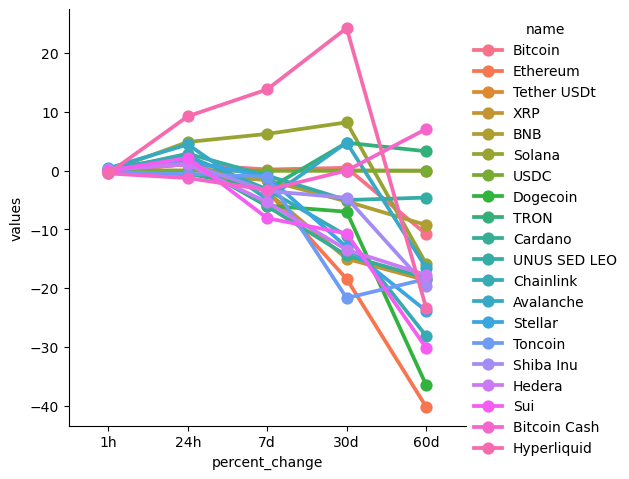

In [136]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

### Answering Questions
The questions asked at the beginning are:

1. Has crypto currency been going up or down lately?
2. What crytpo currency is the most stable?
3. What crypto currency would be best to invest in right now?

Lets start answering!
1. On average, these crypto currencies are trending downwards with only two increasing in value and one staying the same. Over the last 60 days, most currencies have declined a large amount with no signs of slowing down so it would be an improper time to invest in crypto at this time.
2. The most stable crypto currency is USDC as it has the least variation over this period of time. However, this is not a good investment because its value has not changed so you are not likely to gain money even if you aren't likely to lose money either.
3. Of the crypto currencies, I would not suggest not investing in any crypto currencies as there is a steady decline in value for them and it's best to buy during the dip to get the most money, none of these currencies are currently in the dip, rather they are dipping so you are likely to lose money until they stop losing money at such a pace. Once they stablize it's smart to invest right before they rise again.